In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def prng(n, a, m, c, iterations,seed):
#     lst = []
#     last = seed
#     for k in range(iterations):
#         number = seed*a
#     n%M

## Step 1: Generating mandelbrot set

In [41]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        term = None
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

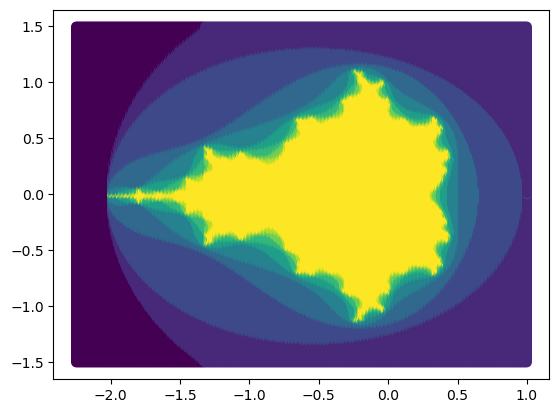

In [40]:
dx = 0.01
xrange = (-2, 0.5)
yrange = (-1,1)
nmax = 10

sety = mandelbrot( dx=dx ,nmax = nmax)
# sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


(3+3j)
